## Visualisation - dynamic heterogeneous sessions in a suddenly changing market
In this notebook I reformat the data so that it lends itself to being visualised and analysed. Then I apply a range of visualisation techniques in order to extract insights from the data.

In [1]:
import scipy as sp
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import pandas as pd
import numpy as np
import glob
import os

In [2]:
path = r'/home/karolina/ieft_cw/data/dhets' 
all_files = glob.glob(os.path.join(path, '*.csv'))

df =pd.DataFrame()
df.to_csv("dhets_1.csv", 'w')
for f in all_files:
     if 'avg_bal' in f:
          n_rows = sum(1 for row in open(f, 'r'))
          row = pd.read_csv(f)
          row.to_csv("dhets_1.csv", mode='a', index=False, header=True)

In [3]:
# df contains the combined static homogenous sessions average final balances sorted by the run description string
df = pd.read_csv("dhets_1.csv", names = ['run', 'trade', 'best_bid', 'best_offer', 'trader_name0', 'total_profit0', 'traders_number0', 'avg_profit0',
 'trader_name1', 'total_profit1', 'traders_number1', 'avg_profit1',
 'trader_name2', 'total_profit2', 'traders_number2', 'avg_profit2',
 'trader_name3', 'total_profit3', 'traders_number3', 'avg_profit3',
 'trader_name4', 'total_profit4', 'traders_number4', 'avg_profit4',
 'trader_name5', 'total_profit5', 'traders_number5', 'avg_profit5'])
df = df.iloc[1: , :]
df = df.sort_values(by=['run'])

#the run number, k and F are extracted from the run string and added as columns to the dataframe
run_n = [str(i)[6] for i in df['run']]
df = df.assign(run_n=run_n)

# now the chars are converted to int and then column k
k = []
for i in df['run']:
    j = 8
    num_temp = ''
    while str(i)[j] != '_':
        num_temp = num_temp + str(i)[j]
        j = j+1
    k.append(int(num_temp))
df = df.assign(k=k)

# same for F
f = [float(str(i)[-3:]) for i in df['run']]
df = df.assign(F=f)

In [4]:
#drop the run name and and dump to a new csv file
df.drop('run', inplace=True, axis=1)
df = df.sort_values(by=['run_n', 'k', 'F'])
df.to_csv('dhets_2.csv', columns = ['trade', 'best_bid', 'best_offer',
 'trader_name0', 'total_profit0', 'traders_number0', 'avg_profit0',
 'trader_name1', 'total_profit1', 'traders_number1', 'avg_profit1',
 'trader_name2', 'total_profit2', 'traders_number2', 'avg_profit2',
 'trader_name3', 'total_profit3', 'traders_number3', 'avg_profit3',
 'trader_name4', 'total_profit4', 'traders_number4', 'avg_profit4',
 'trader_name5', 'total_profit5', 'traders_number5', 'avg_profit5',
'run_n', 'k', 'F'])

In [5]:
df.drop(['trade', 'best_bid', 'best_offer',
 'trader_name0', 'total_profit0', 'traders_number0', 'avg_profit0',
 'trader_name2', 'total_profit2', 'traders_number2', 'avg_profit2',
 'trader_name3', 'total_profit3', 'traders_number3', 'avg_profit3',
 'trader_name4', 'total_profit4', 'traders_number4', 'avg_profit4',
 'trader_name5', 'total_profit5', 'traders_number5', 'avg_profit5'], inplace=True, axis=1)


In [6]:
df.to_csv('dhets_3.csv', columns = [ 'trader_name1', 'total_profit1', 'traders_number1', 'avg_profit1', 'run_n', 'k', 'F'])

In [7]:
df.drop(['trader_name1', 'total_profit1', 'traders_number1'], inplace=True, axis=1)
df.to_csv('dhets_3.csv', columns = [ 'avg_profit1', 'run_n', 'k', 'F'])

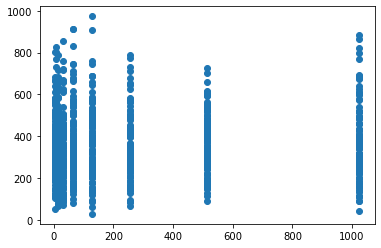

In [9]:
plt.scatter(df['k'], df['avg_profit1'])

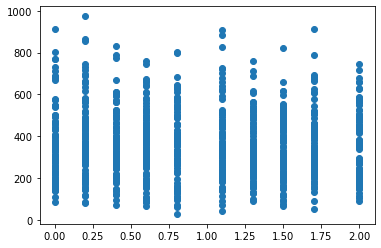

In [10]:
plt.scatter(df['F'], df['avg_profit1'])

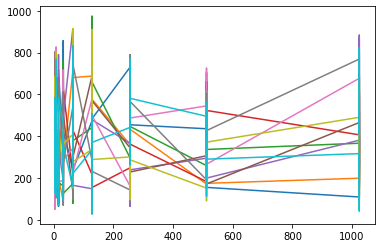

In [11]:
df0 = df.loc[df['run_n'] == '0']
df1 = df.loc[df['run_n'] == '1']
df2 = df.loc[df['run_n'] == '2']
df3 = df.loc[df['run_n'] == '3']
df4 = df.loc[df['run_n'] == '4']
df5 = df.loc[df['run_n'] == '5']
df6 = df.loc[df['run_n'] == '6']
df7 = df.loc[df['run_n'] == '7']
df8 = df.loc[df['run_n'] == '8']
df9 = df.loc[df['run_n'] == '9']
plt.plot(df0['k'], df0['avg_profit1'])
plt.plot(df1['k'], df1['avg_profit1'])
plt.plot(df2['k'], df2['avg_profit1'])
plt.plot(df3['k'], df3['avg_profit1'])
plt.plot(df4['k'], df4['avg_profit1'])
plt.plot(df5['k'], df5['avg_profit1'])
plt.plot(df6['k'], df6['avg_profit1'])
plt.plot(df7['k'], df7['avg_profit1'])
plt.plot(df8['k'], df8['avg_profit1'])
plt.plot(df9['k'], df9['avg_profit1'])


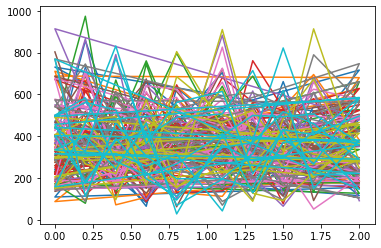

In [12]:
df0 = df.loc[df['run_n'] == '0']
df1 = df.loc[df['run_n'] == '1']
df2 = df.loc[df['run_n'] == '2']
df3 = df.loc[df['run_n'] == '3']
df4 = df.loc[df['run_n'] == '4']
df5 = df.loc[df['run_n'] == '5']
df6 = df.loc[df['run_n'] == '6']
df7 = df.loc[df['run_n'] == '7']
df8 = df.loc[df['run_n'] == '8']
df9 = df.loc[df['run_n'] == '9']
plt.plot(df0['F'], df0['avg_profit1'])
plt.plot(df1['F'], df1['avg_profit1'])
plt.plot(df2['F'], df2['avg_profit1'])
plt.plot(df3['F'], df3['avg_profit1'])
plt.plot(df4['F'], df4['avg_profit1'])
plt.plot(df5['F'], df5['avg_profit1'])
plt.plot(df6['F'], df6['avg_profit1'])
plt.plot(df7['F'], df7['avg_profit1'])
plt.plot(df8['F'], df8['avg_profit1'])
plt.plot(df9['F'], df9['avg_profit1'])

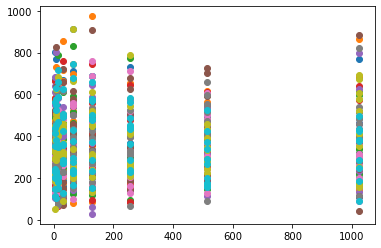

In [13]:
import numpy as np

F_range = np.linspace(0.0, 2.0, 10)
for j in F_range:
    dfx = df.loc[df['F'] == float(str(j)[0:3])]
    plt.scatter(dfx['k'], dfx['avg_profit1'])

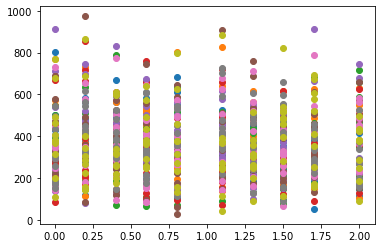

In [14]:
k_range = np.logspace(1, 10, num=10, base=2)
k_range = k_range[1:10]
for j in k_range:
    dfx = df.loc[df['k'] == j]
    plt.scatter(dfx['F'], dfx['avg_profit1'])

In [8]:
#summarize all runs
k_range = np.logspace(1, 10, num=10, base=2)
k_range = k_range[1:10]
F_range = np.linspace(0.0, 2.0, 10)
F_range = [float(str(j)[0:3]) for j in F_range]

df_sum = pd.DataFrame(columns=['k', 'F', 'avg_profit'])

df_sum['k'] = [k for k in df['k'].head(90)]
df_sum['F'] = [f for f in df['F'].head(90)]

avg_prof_means = []
for index, row in df.iterrows():
    if int(row['run_n']) == 0:
        avg_prof_means.append(row['avg_profit1'])
    else:
        avg_prof_means[index%90] += row['avg_profit1']

avg_prof_means = [i/10 for i in avg_prof_means]
df_sum['avg_profit'] = avg_prof_means

In [9]:
df_sum.to_csv('dhets_sum.csv', columns = ['k', 'F', 'avg_profit'])

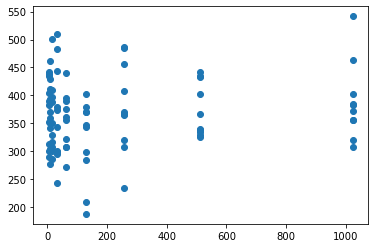

In [17]:
plt.scatter(df_sum['k'], df_sum['avg_profit'])

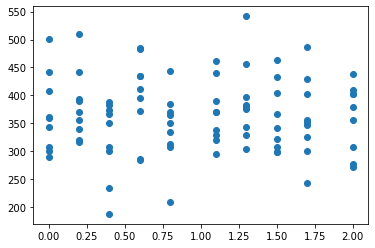

In [18]:
plt.scatter(df_sum['F'], df_sum['avg_profit'])

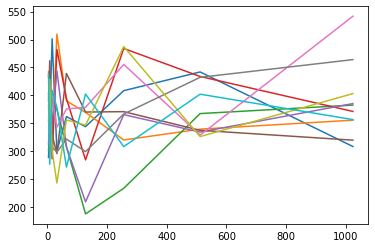

In [19]:
F_range = np.linspace(0.0, 2.0, 10)
for j in F_range:
    dfx = df_sum.loc[df_sum['F'] == float(str(j)[0:3])]
    plt.plot(dfx['k'], dfx['avg_profit'])

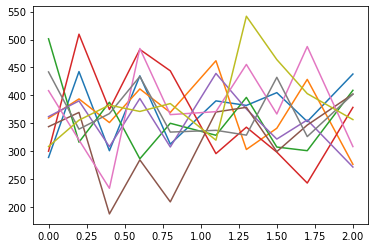

In [20]:
k_range = np.logspace(1, 10, num=10, base=2)
k_range = k_range[1:10]
for j in k_range:
    dfx = df_sum.loc[df_sum['k'] == j]
    plt.plot(dfx['F'], dfx['avg_profit'])

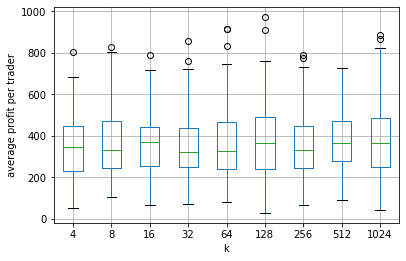

In [9]:
boxplot = df.boxplot(column='avg_profit1', by = 'k')  
boxplot.set_title('')
plt.title('')
plt.suptitle('')
plt.ylabel('average profit per trader')
boxplot = plt.show()

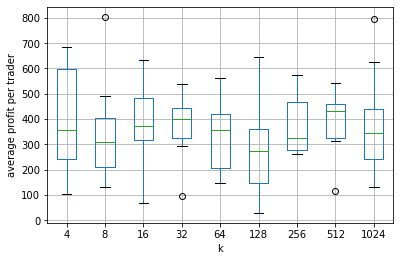

In [10]:
dfF = df.loc[df['F'] == 0.8]
dfF.head()
boxplot = dfF.boxplot(column='avg_profit1', by = 'k')  
boxplot.set_title('')
plt.title('')
plt.suptitle('')
plt.ylabel('average profit per trader')
boxplot = plt.show()

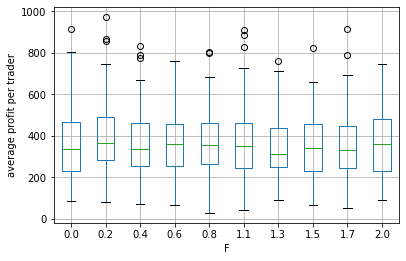

In [11]:
boxplot = df.boxplot(column='avg_profit1', by = 'F')  
boxplot.set_title('')
plt.title('')
plt.suptitle('')
plt.ylabel('average profit per trader')
boxplot = plt.show()

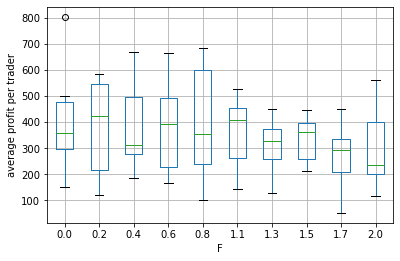

In [12]:
dfk = df.loc[df['k'] == 4]
dfk.head()
boxplot = dfk.boxplot(column='avg_profit1', by = 'F')  
boxplot.set_title('')
plt.title('')
plt.suptitle('')
plt.ylabel('average profit per trader')
boxplot = plt.show()

In [10]:
sorted_df = df.sort_values(['avg_profit1'], ascending=False)
print(sorted_df.head())
sorted_df_sum = df_sum.sort_values(['avg_profit'], ascending=False)
print(sorted_df_sum.head())

     avg_profit1 run_n     k    F
443        974.0     2   128  0.2
439        913.9     4    64  0.0
616        913.7     8    64  1.7
318        910.4     8   128  1.1
465        883.5     4  1024  1.1
       k    F  avg_profit
86  1024  1.3      541.72
31    32  0.2      509.57
20    16  0.0      501.32
68   256  1.7      487.45
63   256  0.6      484.02
